In [1]:
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
import itertools as it

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
data = pd.read_csv("../data/data_timbre.csv")

NUM_CLUSTERS = 10

data['binary_order'] = (data['track_number']-1)%NUM_CLUSTERS # average number of tracks / album

# labels = data['binary_order']
labels = data['track_number']/data['total_tracks']

columns_to_remove = ['binary_order',
                    'Unnamed: 0.1',
                    'Unnamed: 0',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'key',
                    'mode',
                    'duration_ms',
                    'time_signature']
                  

data.drop(columns = columns_to_remove, axis = 1, inplace = True)

        # Train on:
        # Danceability, Energy, Loudness, Speechiness, Acousticness, 
        # Instrumentalness, Liveness, Valence, Tempo, 

        # Labels:
        # Track Number/Total Albums

columns = data.columns
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_timbre,song_timbre_start,song_timbre_end,loudness_start,loudness_end
0,0.788,0.616,-10.671,0.0337,0.00286,0.549000,0.0952,0.6960,119.037,0.410775,0.502790,0.381447,-50.058500,-50.912
1,0.712,0.500,-11.948,0.0338,0.82500,0.314000,0.1060,0.6820,90.039,0.288576,0.358865,0.420081,-40.046167,-46.607
2,0.740,0.682,-10.420,0.0504,0.06920,0.530000,0.3810,0.4100,113.201,0.295317,0.452228,0.415978,-14.745556,-42.064
3,0.702,0.297,-14.116,0.0317,0.89400,0.485000,0.1030,0.0676,110.116,0.292235,0.431800,0.463382,-38.945889,-58.058
4,0.775,0.585,-9.516,0.0271,0.04220,0.619000,0.0770,0.5180,109.942,0.195611,0.382496,0.894774,-14.908800,-0.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0.530,0.275,-13.868,0.0349,0.46000,0.000011,0.0729,0.0698,133.973,0.140222,0.303244,0.675694,-8.244444,-16.261
4945,0.490,0.495,-12.252,0.0338,0.17300,0.000000,0.0794,0.2300,148.967,0.156536,0.221387,0.418692,-48.704600,-48.996
4946,0.767,0.355,-10.031,0.0445,0.14600,0.000000,0.2980,0.2880,119.992,0.272332,0.456071,0.726044,-21.911778,-56.151
4947,0.743,0.379,-13.629,0.0784,0.20700,0.196000,0.1110,0.1830,127.030,0.172822,0.095022,1.000000,-16.969600,-5.312


In [17]:
perm = it.combinations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),perm))
print(len(list(output)))

364


                                             features     score elbow
0                   [liveness, loudness, speechiness]  0.595033     3
1   [instrumentalness, song_timbre_start, speechin...  0.613385     3
2        [instrumentalness, liveness, loudness_start]  0.509329     3
3          [acousticness, instrumentalness, loudness]  0.639755     4
4           [instrumentalness, liveness, speechiness]  0.640271     4
5                [liveness, song_timbre, speechiness]  0.604683     3
6             [instrumentalness, loudness_end, tempo]  0.511886     3
7           [instrumentalness, liveness, song_timbre]  0.599462     3
8                 [acousticness, energy, speechiness]  0.604348     3
9                    [acousticness, energy, liveness]  0.500984     3
10                    [acousticness, liveness, tempo]  0.540955     3
11            [acousticness, instrumentalness, tempo]    0.6069     4
12    [instrumentalness, liveness, song_timbre_start]  0.503299     3
13           [loudne

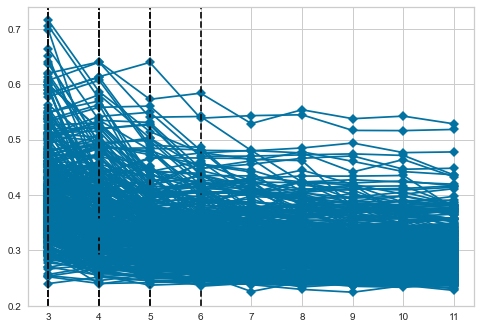

In [18]:
a=[]
column_names = ["features", "score", "elbow"]
df3 = pd.DataFrame(columns = column_names)

for i in list(output):
    df1 = data[[i[0], i[1], i[2]]]
    x = df1.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(3,12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_
    if score>0.5:
        # visualizer.show()
        idx = df1.columns
        mylist = idx.tolist()

        df666 = pd.DataFrame(columns = column_names)

        df666['features'] = [mylist]
        df666['score'] = score
        df666['elbow'] = value

        df3 = pd.concat([df3, df666], ignore_index=True)

print(df3)

# df3.to_csv('elbow_clusters.csv', index=False)

In [20]:
df3 = df3.sort_values('elbow', ascending=False)
df3 = df3.sort_values('score', ascending=False)
df3.to_csv('../data/elbow_clusters.csv', index=False)
df3['features'][0]
df3

,features,score,elbow
15,"[instrumentalness, loudness, speechiness]",0.71519,3
19,"[instrumentalness, song_timbre, speechiness]",0.705154,3
26,"[instrumentalness, speechiness, tempo]",0.698394,3
38,"[acousticness, loudness, speechiness]",0.664107,3
36,"[danceability, instrumentalness, speechiness]",0.650664,3
4,"[instrumentalness, liveness, speechiness]",0.640271,4
54,"[acousticness, song_timbre, speechiness]",0.639943,3
3,"[acousticness, instrumentalness, loudness]",0.639755,4
43,"[acousticness, instrumentalness, speechiness]",0.639417,5
49,"[acousticness, speechiness, tempo]",0.636725,3


In [22]:
import pandas as pd
from tabulate import tabulate
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
# from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer

In [23]:
data = pd.read_csv("../data/data_timbre.csv")
df = pd.read_csv("../data/data_timbre.csv")
columns_to_remove = ['Unnamed: 0',
                    'Unnamed: 0.1',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'key',
                    'mode',
                    'duration_ms',
                    'time_signature']
                  

df.drop(columns = columns_to_remove, axis = 1, inplace = True)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_timbre,song_timbre_start,song_timbre_end,loudness_start,loudness_end
0,0.788,0.616,-10.671,0.0337,0.00286,0.549000,0.0952,0.6960,119.037,0.410775,0.502790,0.381447,-50.058500,-50.912
1,0.712,0.500,-11.948,0.0338,0.82500,0.314000,0.1060,0.6820,90.039,0.288576,0.358865,0.420081,-40.046167,-46.607
2,0.740,0.682,-10.420,0.0504,0.06920,0.530000,0.3810,0.4100,113.201,0.295317,0.452228,0.415978,-14.745556,-42.064
3,0.702,0.297,-14.116,0.0317,0.89400,0.485000,0.1030,0.0676,110.116,0.292235,0.431800,0.463382,-38.945889,-58.058
4,0.775,0.585,-9.516,0.0271,0.04220,0.619000,0.0770,0.5180,109.942,0.195611,0.382496,0.894774,-14.908800,-0.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0.530,0.275,-13.868,0.0349,0.46000,0.000011,0.0729,0.0698,133.973,0.140222,0.303244,0.675694,-8.244444,-16.261
4945,0.490,0.495,-12.252,0.0338,0.17300,0.000000,0.0794,0.2300,148.967,0.156536,0.221387,0.418692,-48.704600,-48.996
4946,0.767,0.355,-10.031,0.0445,0.14600,0.000000,0.2980,0.2880,119.992,0.272332,0.456071,0.726044,-21.911778,-56.151
4947,0.743,0.379,-13.629,0.0784,0.20700,0.196000,0.1110,0.1830,127.030,0.172822,0.095022,1.000000,-16.969600,-5.312


In [24]:
#  ----------------------------------------- Scaled Data  ---------------------
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled1 = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled1)
df1.columns = df.columns #['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','song_timbre','song_timbre_start','song_timbre_end','loudness_start','loudness_end']

print(df1.head(10))

   danceability    energy  loudness  speechiness  acousticness  \
0      0.796764  0.616030  0.679207     0.035141      0.002877   
1      0.719919  0.498818  0.638903     0.035245      0.829980   
2      0.748231  0.682719  0.687129     0.052555      0.069618   
3      0.709808  0.293697  0.570477     0.033055      0.899396   
4      0.783620  0.584706  0.715661     0.028259      0.042455   
5      0.841254  0.659479  0.768937     0.059437      0.084406   
6      0.293225  0.409898  0.616463     0.047758      0.479879   
7      0.819009  0.794879  0.719196     0.042023      0.038028   
8      0.723964  0.648364  0.658408     0.035141      0.369215   
9      0.554095  0.707981  0.545670     0.036705      0.515091   

   instrumentalness  liveness   valence     tempo  song_timbre  \
0          0.552314  0.095775  0.712385  0.479872     0.464652   
1          0.315895  0.106640  0.698055  0.362973     0.294661   
2          0.533199  0.383300  0.419652  0.456345     0.304038   
3        

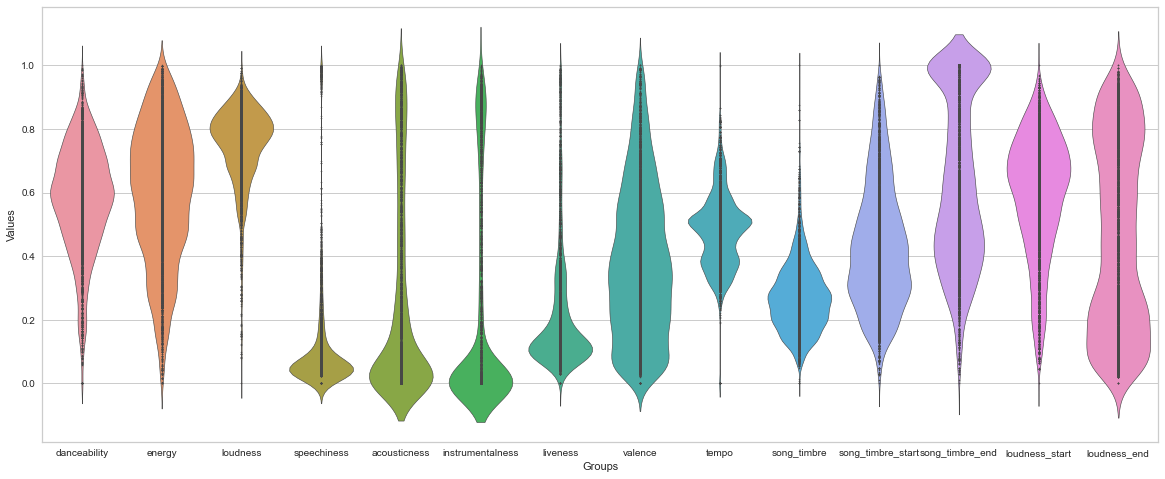

In [25]:
# --------------------------------- Violing plot and heat map --------------

# ax = sns.heatmap(df1.cov(),vmin=-0.08, vmax=0.08, annot = True)
# plt.show()


f, axes = plt.subplots(figsize=[20,8])
# plt.xlim([-0.7, 1.6])

df2 = df1.melt(var_name='Groups', value_name='Values')
ax = sns.violinplot(x="Groups", y="Values", data=df2, linewidth = 0.6, inner = 'point', scale= 'width')
plt.show()

In [26]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_timbre,song_timbre_start,song_timbre_end,loudness_start,loudness_end
0,0.788,0.616,-10.671,0.0337,0.00286,0.549000,0.0952,0.6960,119.037,0.410775,0.502790,0.381447,-50.058500,-50.912
1,0.712,0.500,-11.948,0.0338,0.82500,0.314000,0.1060,0.6820,90.039,0.288576,0.358865,0.420081,-40.046167,-46.607
2,0.740,0.682,-10.420,0.0504,0.06920,0.530000,0.3810,0.4100,113.201,0.295317,0.452228,0.415978,-14.745556,-42.064
3,0.702,0.297,-14.116,0.0317,0.89400,0.485000,0.1030,0.0676,110.116,0.292235,0.431800,0.463382,-38.945889,-58.058
4,0.775,0.585,-9.516,0.0271,0.04220,0.619000,0.0770,0.5180,109.942,0.195611,0.382496,0.894774,-14.908800,-0.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0.530,0.275,-13.868,0.0349,0.46000,0.000011,0.0729,0.0698,133.973,0.140222,0.303244,0.675694,-8.244444,-16.261
4945,0.490,0.495,-12.252,0.0338,0.17300,0.000000,0.0794,0.2300,148.967,0.156536,0.221387,0.418692,-48.704600,-48.996
4946,0.767,0.355,-10.031,0.0445,0.14600,0.000000,0.2980,0.2880,119.992,0.272332,0.456071,0.726044,-21.911778,-56.151
4947,0.743,0.379,-13.629,0.0784,0.20700,0.196000,0.1110,0.1830,127.030,0.172822,0.095022,1.000000,-16.969600,-5.312


In [30]:
# #  -------------------------------- Finding k  -------------------------------

df1 = df[['instrumentalness',  'song_timbre',  'speechiness']]

x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled2)
df1

,0,1,2
0,0.552314,0.464652,0.035141
1,0.315895,0.294661,0.035245
2,0.533199,0.304038,0.052555
3,0.487928,0.299750,0.033055
4,0.622736,0.165337,0.028259
...,...,...,...
4944,0.000011,0.088285,0.036392
4945,0.000000,0.110979,0.035245
4946,0.000000,0.272064,0.046403
4947,0.197183,0.133634,0.081752


In [50]:
#  ------------------------ k-means Clustering ---------------------
x_scaled2 = df1

kmeans = KMeans(init="k-means++",
                n_clusters=3,
                max_iter = 500).fit(x_scaled2)
df1['kmeans'] = pd.DataFrame(kmeans.labels_)
# df1.columns = ['energy', 'instrumentalness', 'loudness',']


df['kmeans'] = df1['kmeans']

fig = px.scatter_3d(df, x='energy', y='instrumentalness', z='loudness',
              color='kmeans')
fig.show()

C:\Users\crisp\anaconda3\envs\AI_general\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [31]:
# #  ------------------------ DBSCAN Clustering ---------------------

# dbscan = DBSCAN(eps=4,min_samples=5).fit(x_scaled2)
# df1['dbscan'] = dbscan.labels_
# df1.columns = ['danceability', 'instrumentalness', 'loudness', 'speechiness', 'tempo','dbscan' ]


# dbscan = df1['dbscan']
# df['dbscan'] = dbscan

# fig = px.scatter_3d(df, x='energy', y='instrumentalness', z='loudness',
#               color='dbscan')
# fig.show()

C:\Users\crisp\AppData\Local\Temp\ipykernel_8356\3369150997.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\crisp\AppData\Local\Temp\ipykernel_8356\3369150997.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\crisp\AppData\Local\Temp\ipykernel_8356\3369150997.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



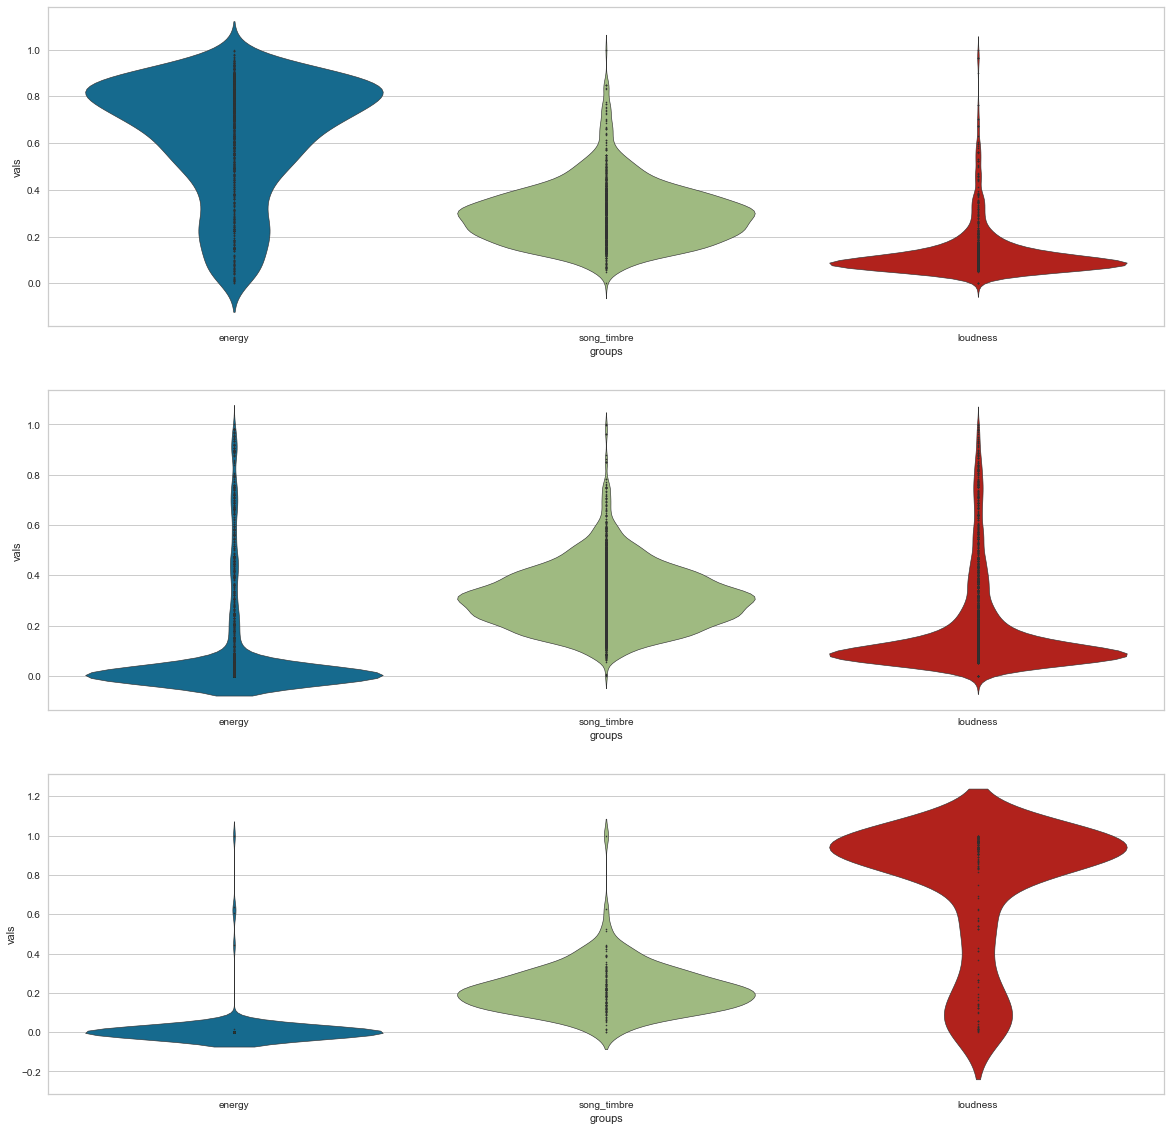

In [52]:
# ---------------------------------- Violin Plot for each cluster ------------------

cols_to_plot = ['energy', 'song_timbre', 'loudness' ]

c0 = df1[df1['kmeans']==0]
c1 = df1[df1['kmeans']==1]
c2 = df1[df1['kmeans']==2]
# c3 = df1[df1['kmeans']==3]
# c4 = df1[df1['kmeans']==4]

# genre =df ['genre']
# c0['genre'] = genre
# c1['genre'] = genre
# c2['genre'] = genre

c0.drop(['kmeans'], axis=1, inplace=True)
c1.drop(['kmeans'], axis=1, inplace=True)
c2.drop(['kmeans'], axis=1, inplace=True)
# c3.drop(['kmeans'], axis=1, inplace=True)
# c4.drop(['kmeans'], axis=1, inplace=True)


x = c0.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = cols_to_plot
c0=c0.melt(var_name='groups', value_name='vals')

x = c1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = cols_to_plot
c1=c1.melt(var_name='groups', value_name='vals')

x = c2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
c2_scaled = min_max_scaler.fit_transform(x)
c2 = pd.DataFrame(c2_scaled)
c2.columns = cols_to_plot
c2=c2.melt(var_name='groups', value_name='vals')

# x = c3.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# c3_scaled = min_max_scaler.fit_transform(x)
# c3 = pd.DataFrame(c3_scaled)
# c3.columns = cols_to_plot
# c3=c3.melt(var_name='groups', value_name='vals')

# x = c4.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# c4_scaled = min_max_scaler.fit_transform(x)
# c4 = pd.DataFrame(c4_scaled)
# c4.columns = cols_to_plot
# c4=c4.melt(var_name='groups', value_name='vals')

f, axes = plt.subplots(3, 1, figsize=(20,20))
ax = sns.violinplot( data=c0 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax = sns.violinplot( data=c1 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
ax = sns.violinplot( data=c2 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[2])
# ax = sns.violinplot( data=c3 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[3])
# ax = sns.violinplot( data=c4 ,x="groups", y="vals", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[4])

plt.show()